<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EC%9D%BC%EB%B0%98%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), _ = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1,784)
x_train.shape

(60000, 784)

In [7]:
x_train = x_train/255.0

In [8]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [9]:
rn = np.random.random((len(x_train),784))
zn = np.zeros((len(x_train),784))

In [11]:
rn.shape, zn.shape

((60000, 784), (60000, 784))

In [12]:
x_train2 = np.concatenate([x_train,rn], axis=1)
x_train2.shape

(60000, 1568)

In [13]:
x_train3 = np.concatenate([x_train,zn], axis=1)
x_train3.shape

(60000, 1568)

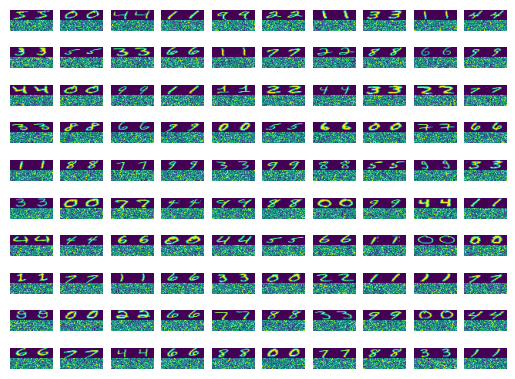

In [14]:
tx_train = x_train2.reshape(-1,28,56)
fig,axs = plt.subplots(ncols=10,nrows=10)
for r in range(10):
  for c in range(10):
    axs[r][c].imshow(tx_train[r*10+c])
    axs[r][c].axis('off')
    pass
plt.show()

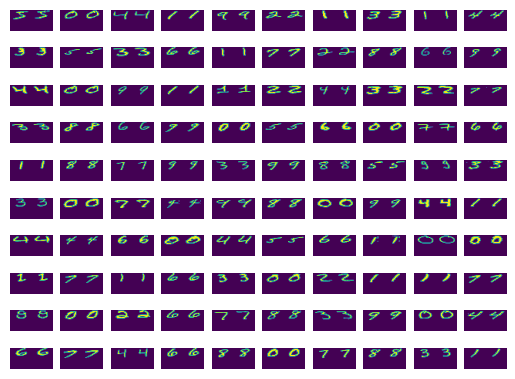

In [15]:
tx_train = x_train3.reshape(-1,28,56)
fig,axs = plt.subplots(ncols=10,nrows=10)
for r in range(10):
  for c in range(10):
    axs[r][c].imshow(tx_train[r*10+c])
    axs[r][c].axis('off')
    pass
plt.show()

In [17]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss=keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
    return model

In [18]:
model = get_model()
hist1 = model.fit(x_train2, y_train, epochs=10, validation_split=0.2)
print("---------------------------------------------------")
model = get_model()
hist2 = model.fit(x_train3, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 24s 15ms/step - loss: 0.4342 - accuracy: 0.8636 - val_loss: 0.2122 - val_accuracy: 0.9354
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1857 - accuracy: 0.9432 - val_loss: 0.1574 - val_accuracy: 0.9553
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1250 - accuracy: 0.9620 - val_loss: 0.1609 - val_accuracy: 0.9530
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0930 - accuracy: 0.9711 - val_loss: 0.1644 - val_accuracy: 0.9557
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.1374 - val_accuracy: 0.9683
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.1897 - val_accuracy: 0.9578
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.1540 -

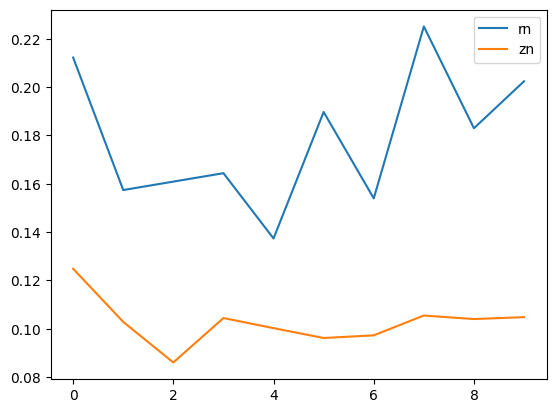

In [19]:
plt.plot(hist1.history['val_loss'],label='rn')
plt.plot(hist2.history['val_loss'],label='zn')
#plt.plot(hist1.history['loss'],label='rn loss')
#plt.plot(hist2.history['loss'],label='zn loss')
plt.legend()
plt.show()

In [20]:
model = get_model()
hist3 = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2276 - accuracy: 0.9321 - val_loss: 0.1146 - val_accuracy: 0.9661
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0942 - accuracy: 0.9719 - val_loss: 0.1024 - val_accuracy: 0.9694
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0646 - accuracy: 0.9808 - val_loss: 0.0839 - val_accuracy: 0.9763
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0939 - val_accuracy: 0.9763
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0934 - val_accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.0918 - val_accuracy: 0.9778
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.1049 - val_ac

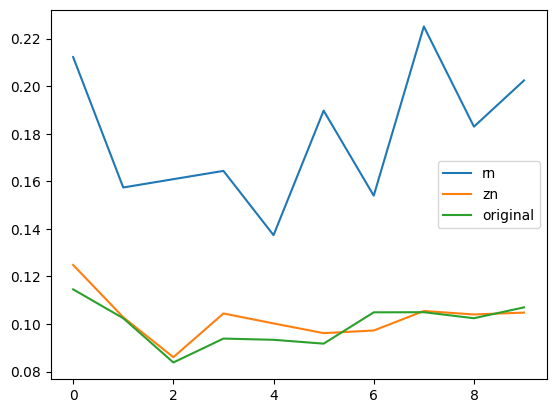

In [24]:
plt.plot(hist1.history['val_loss'],label='rn')
plt.plot(hist2.history['val_loss'],label='zn')
plt.plot(hist3.history['val_loss'],label='original')
#plt.plot(hist1.history['loss'],label='rn loss')
#plt.plot(hist2.history['loss'],label='zn loss')
plt.legend()
plt.show()